Is the dataset linearly separable? Yes


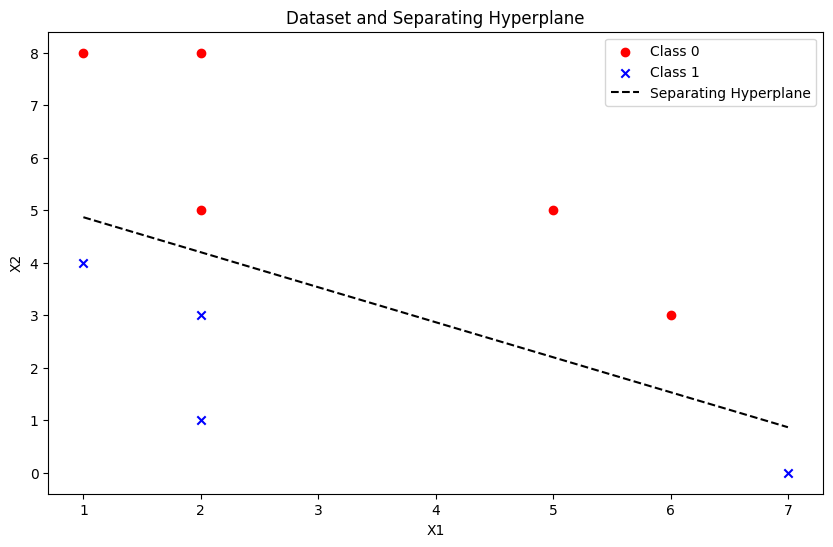

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 2: Define the dataset
data = np.array([
    [1, 8, 0],
    [2, 8, 0],
    [2, 5, 0],
    [5, 5, 0],
    [6, 3, 0],
    [1, 4, 1],
    [2, 1, 1],
    [2, 3, 1],
    [7, 0, 1]
])

X = data[:, :2]
y = data[:, 2]

# Step 3: Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Step 4: Check if the dataset is linearly separable
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
is_separable = accuracy == 1.0

print(f"Is the dataset linearly separable? {'Yes' if is_separable else 'No'}")

# Step 5: Plot the dataset and the separating hyperplane
plt.figure(figsize=(10, 6))

# Plot the points
for i, point in enumerate(X):
    if y[i] == 0:
        plt.scatter(point[0], point[1], color='red', marker='o', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(point[0], point[1], color='blue', marker='x', label='Class 1' if i == 5 else "")

# Plot the separating hyperplane
w = svm.coef_[0]
b = svm.intercept_[0]
x_plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_plot = -(w[0] * x_plot + b) / w[1]
plt.plot(x_plot, y_plot, 'k--', label='Separating Hyperplane')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Dataset and Separating Hyperplane')
plt.show()

In [4]:
import numpy as np
from math import log, exp

# Dataset
data = [
    {'x': np.array([1, 8]), 'y': 0},
    {'x': np.array([2, 8]), 'y': 0},
    {'x': np.array([2, 5]), 'y': 0},
    {'x': np.array([5, 5]), 'y': 0},
    {'x': np.array([6, 3]), 'y': 0},
    {'x': np.array([1, 4]), 'y': 1},
    {'x': np.array([2, 1]), 'y': 1},
    {'x': np.array([2, 3]), 'y': 1},
    {'x': np.array([7, 0]), 'y': 1}
]

# Initial weights
w = np.array([-0.3, -0.8, 3.0])

# Learning rate
eta = 0.05

# Number of iterations
num_iterations = 10

# Store weights for each iteration
weights_history = [w.copy()]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Compute initial cross-entropy loss over all data points
total_loss = 0
for point in data:
    x_hat = np.append(point['x'], 1)  # Concatenate 1 for bias term
    z = np.dot(w, x_hat)
    y_pred = sigmoid(z)
    loss = cross_entropy_loss(point['y'], y_pred)
    total_loss += loss

print(f"Initial Total Cross-Entropy Loss: {total_loss:.4f}\n")

# Perform SGD updates
for t in range(1, num_iterations + 1):
    # Get the current data point (cycling through the dataset)
    point = data[(t - 1) % len(data)]
    x_hat = np.append(point['x'], 1)  # Concatenate 1 for bias term
    y_true = point['y']
    
    # Compute prediction
    z = np.dot(w, x_hat)
    y_pred = sigmoid(z)
    
    # Compute gradient
    gradient = (y_pred - y_true) * x_hat
    
    # Update weights
    w = w - eta * gradient
    
    # Store updated weights
    weights_history.append(w.copy())
    
    # Print weights for this iteration
    print(f"Iteration {t}: w1 = {w[0]:.6f}, w2 = {w[1]:.6f}, w3 = {w[2]:.6f}")

# Optional: Print final weights history
print("\nWeights History:")
for idx, weights in enumerate(weights_history):
    print(f"t = {idx}: w = {weights}")



Initial Total Cross-Entropy Loss: 2.7609

Iteration 1: w1 = -0.301206, w2 = -0.809651, w3 = 2.998794
Iteration 2: w1 = -0.302868, w2 = -0.816296, w3 = 2.997963
Iteration 3: w1 = -0.318455, w2 = -0.855265, w3 = 2.990169
Iteration 4: w1 = -0.331763, w2 = -0.868572, w3 = 2.987508
Iteration 5: w1 = -0.381790, w2 = -0.893586, w3 = 2.979170
Iteration 6: w1 = -0.345465, w2 = -0.748285, w3 = 3.015495
Iteration 7: w1 = -0.328332, w2 = -0.739719, w3 = 3.024061
Iteration 8: w1 = -0.282032, w2 = -0.670267, w3 = 3.047212
Iteration 9: w1 = -0.192839, w2 = -0.670267, w3 = 3.059953
Iteration 10: w1 = -0.196650, w2 = -0.700750, w3 = 3.056143

Weights History:
t = 0: w = [-0.3 -0.8  3. ]
t = 1: w = [-0.30120635 -0.80965081  2.99879365]
t = 2: w = [-0.30286764 -0.81629595  2.99796301]
t = 3: w = [-0.31845506 -0.85526451  2.99016929]
t = 4: w = [-0.33176263 -0.86857208  2.98750778]
t = 5: w = [-0.38178987 -0.8935857   2.97916991]
t = 6: w = [-0.34546461 -0.74828467  3.01549516]
t = 7: w = [-0.32833234 -0.

In [ ]:
alpha = 0.5  # learning rate
gamma = 0.9  # discount factor

# Reinitialize Q-values to 0 for each (state, action) pair for a fresh start
Q_values = {
    ((1, 1), 'up'): 0, ((2, 1), 'left'): 0, ((1, 2), 'up'): 0,
    ((1, 3), 'right'): 0, ((2, 3), 'right'): 0, ((3, 3), 'right'): 0,
    ((4, 3), 'exit'): 0
}

# Episode 1 trajectory [(state, action, reward)]
episode_1 = [
    ((1, 1), 'up', -1), ((2, 1), 'left', -1), ((1, 1), 'up', -1),
    ((1, 2), 'up', -1), ((1, 3), 'right', -1), ((2, 3), 'right', -1),
    ((3, 3), 'right', -1), ((4, 3), 'exit', 100)
]

# Episode 2 trajectory [(state, action, reward)]
episode_2 = [
    ((1, 1), 'up', -1), ((1, 2), 'up', -1), ((1, 3), 'right', -1),
    ((2, 3), 'right', -1), ((3, 3), 'right', -1), ((4, 3), 'exit', 100)
]

# Store Q-value updates for each step for detailed tracking
episode_1_updates = []
episode_2_updates = []

# Helper function to track each step
def track_update(episode, Q_values, episode_updates):
    for i in range(len(episode) - 1):
        (s, a, r) = episode[i]
        (s_next, a_next, _) = episode[i + 1]
        # Calculate the Q-value update
        Q_values[(s, a)] += alpha * (r + gamma * Q_values[(s_next, a_next)] - Q_values[(s, a)])
        # Track the update
        episode_updates.append(((s, a), Q_values[(s, a)]))
    
    # Terminal state
    (s, a, r) = episode[-1]
    Q_values[(s, a)] += alpha * (r - Q_values[(s, a)])
    episode_updates.append(((s, a), Q_values[(s, a)]))
    
    return Q_values, episode_updates

# Perform updates for episode 1
Q_values, episode_1_updates = track_update(episode_1, Q_values, episode_1_updates)

# Perform updates for episode 2
Q_values, episode_2_updates = track_update(episode_2, Q_values, episode_2_updates)

# Convert updates to DataFrames for each episode
episode_1_df = pd.DataFrame(episode_1_updates, columns=['State-Action Pair', 'Q-value after update'])
episode_2_df = pd.DataFrame(episode_2_updates, columns=['State-Action Pair', 'Q-value after update'])

KeyError: ((1, 3), 'right')